# what is data normalization?


# metrics is actually what is printed out
# example metrics=error_rate so error_rate will be printed out.

# validation set is the one that our model never gets to see while training
# so if think our model is only predicting few classes images correct we confirm correctness of our model from validation accuracy (beacuse validation data confirms about Overfitting of data)

In [56]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

# path will be 
# destination of complete folder that contains folders like 
# Training ,Testing folder labels file etc.

# example of folders is given
[PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/export.pkl'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/test'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/train'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/history.csv'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/cleaned.csv'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_tiny/valid')]

In [38]:
path='/home/sahib/notetrain/'

In [39]:
tfms = get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path,ds_tfms=tfms,  size=64)

In [35]:
fnames = get_image_files('/home/sahib/notetrain/train/INR10')
fnames[:5]

[PosixPath('/home/sahib/notetrain/train/INR10/IMG-20190304-WA0108.jpg'),
 PosixPath('/home/sahib/notetrain/train/INR10/IMG-20190303-WA0065.jpg'),
 PosixPath('/home/sahib/notetrain/train/INR10/IMG-20190305-WA0005.jpg'),
 PosixPath('/home/sahib/notetrain/train/INR10/IMG-20190305-WA0052.jpg'),
 PosixPath('/home/sahib/notetrain/train/INR10/IMG-20190304-WA0090.jpg')]

In [21]:
#np.random.seed(42)
#data = ImageDataBunch.from_folder('/home/sahib/notetrain/train/', train='.', valid_pct=0.2,
                                 # ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [44]:
print(data.classes)
len(data.classes)

['INR10', 'INR20', 'other']


3

In [ ]:
#data.show_batch(rows=3, figsize=(7,7))

# METHOD BELOW ALSO WORKS

In [43]:
'''data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch
'''


In [45]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)# creating model using transfer learning

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/sahib/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [01:22<00:00, 1060450.00it/s]


In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.969245,0.476320,0.291667,03:08
1,0.687491,0.163771,0.083333,04:48
2,0.527354,0.133479,0.041667,03:08
3,0.436449,0.118629,0.041667,03:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


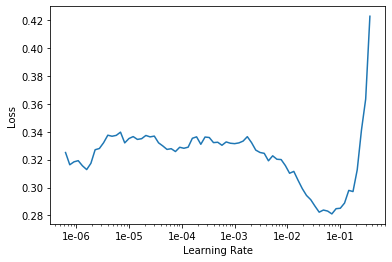

In [48]:
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.save('notetrain-model')# this model will be saved in a folder named model in path directory defined above
# ex-->
# path='/home/sahib/notetrain/'

In [51]:
interpretation=ClassificationInterpretation.from_learner(learn)
losses,idxs = interpretation.top_losses()

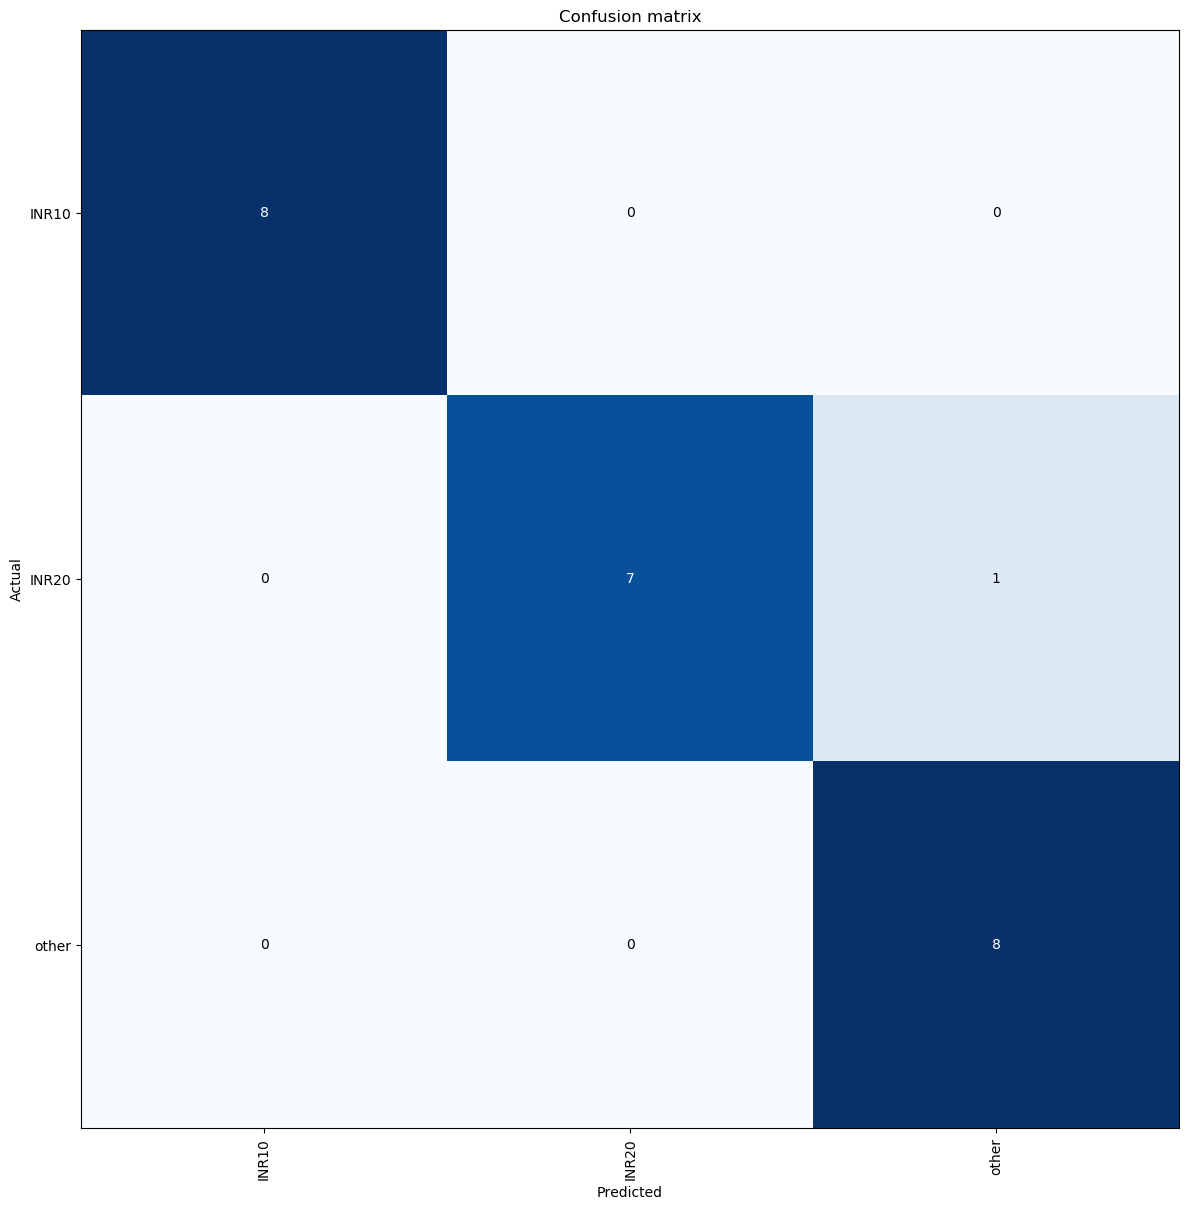

In [58]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=100)


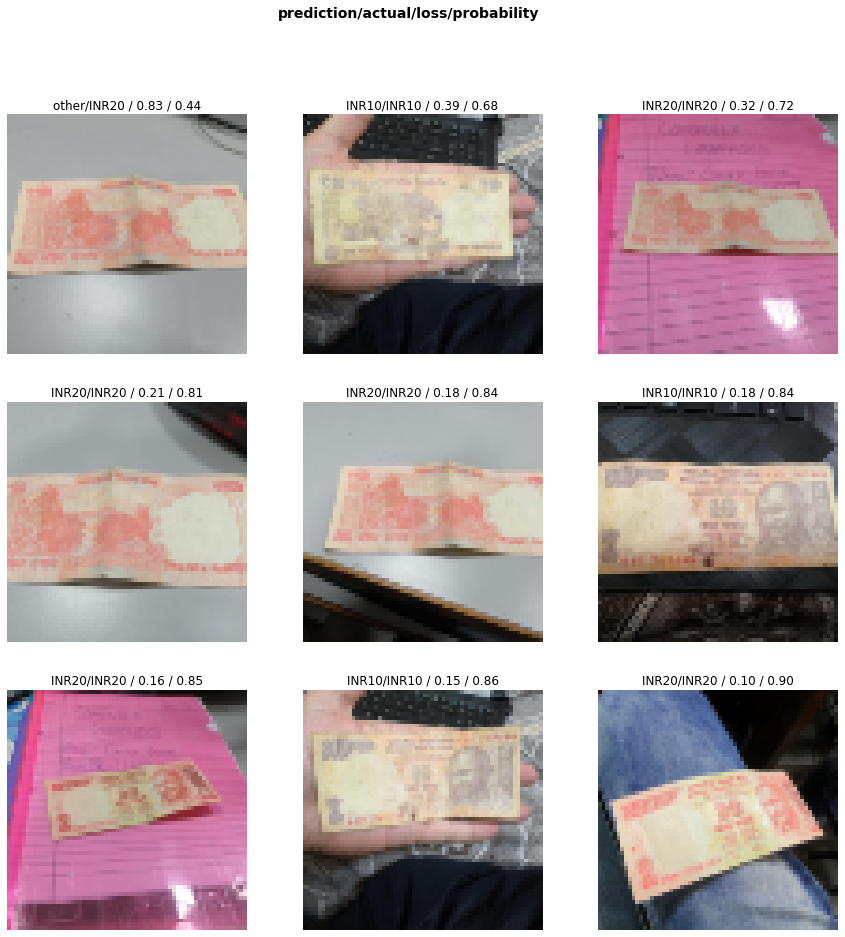

In [55]:
interpretation.plot_top_losses(9, figsize=(15,15))

# Extra work below


In [61]:
learn.export()

In [63]:
learner_for_inference = load_learner(path)

In [69]:
img = data.train_ds[1][0]
learner_for_inference.predict(img)

(Category INR20, tensor(1), tensor([0.0085, 0.7374, 0.2541]))

In [68]:
learn = load_learner(path, test=ImageList.from_folder(path))